1) Setup

In [2]:
# 03_Export_Forecast.ipynb — Export & Visualize Forecasts

import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)


2) Load Forecast Results

In [3]:
# Paths
forecast_path = "../data/forecast_results.csv" if os.path.exists("../data/forecast_results.csv") else "data/forecast_results.csv"
actual_path   = "../data/actual_vs_forecast.csv" if os.path.exists("../data/actual_vs_forecast.csv") else "data/actual_vs_forecast.csv"

# Helper: load CSV + normalize Date column
def load_with_date(path):
    df_temp = pd.read_csv(path)
    print(f"📂 {os.path.basename(path)} columns:", df_temp.columns.tolist())
    date_col = "Date" if "Date" in df_temp.columns else ("ds" if "ds" in df_temp.columns else None)
    if date_col is None:
        raise ValueError(f"No Date/ds column found in {path}")
    df = pd.read_csv(path, parse_dates=[date_col])
    return df.rename(columns={date_col: "Date"})

# Load both files
df_forecast = load_with_date(forecast_path)
df_actual_forecast = load_with_date(actual_path)

print("✅ Forecast loaded:", df_forecast.shape)
print("✅ Actual vs Forecast loaded:", df_actual_forecast.shape)
df_forecast.head()


📂 forecast_results.csv columns: ['ds', 'yhat', 'yhat_lower', 'yhat_upper']
📂 actual_vs_forecast.csv columns: ['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']
✅ Forecast loaded: (1458, 4)
✅ Actual vs Forecast loaded: (1458, 5)


,Date,yhat,yhat_lower,yhat_upper
0,2014-01-03,1359.425950,-1203.435979,3809.127633
1,2014-01-04,992.203163,-1499.624911,3545.742756
2,2014-01-05,1011.974847,-1579.799638,3382.140525
3,2014-01-06,1170.357989,-1341.568800,3603.125490
4,2014-01-07,485.159555,-1963.130012,2935.554710


3) Quick Stats

In [4]:
print("Forecast range:", df_forecast["Date"].min().date(), "→", df_forecast["Date"].max().date())
print("Actual vs Forecast range:", df_actual_forecast["Date"].min().date(), "→", df_actual_forecast["Date"].max().date())

print("\n📊 Forecast sample:")
print(df_forecast.head())

print("\n📊 Actual vs Forecast sample:")
print(df_actual_forecast.head())


Forecast range: 2014-01-03 → 2017-12-30
Actual vs Forecast range: 2014-01-03 → 2017-12-30

📊 Forecast sample:
        Date         yhat   yhat_lower   yhat_upper
0 2014-01-03  1359.425950 -1203.435979  3809.127633
1 2014-01-04   992.203163 -1499.624911  3545.742756
2 2014-01-05  1011.974847 -1579.799638  3382.140525
3 2014-01-06  1170.357989 -1341.568800  3603.125490
4 2014-01-07   485.159555 -1963.130012  2935.554710

📊 Actual vs Forecast sample:
        Date         y         yhat   yhat_lower   yhat_upper
0 2014-01-03    16.448  1359.425950 -1203.435979  3809.127633
1 2014-01-04   288.060   992.203163 -1499.624911  3545.742756
2 2014-01-05    19.536  1011.974847 -1579.799638  3382.140525
3 2014-01-06  4407.100  1170.357989 -1341.568800  3603.125490
4 2014-01-07    87.158   485.159555 -1963.130012  2935.554710


4) Plot Forecast (full horizon)

📂 df_forecast columns: ['Date', 'yhat', 'yhat_lower', 'yhat_upper']


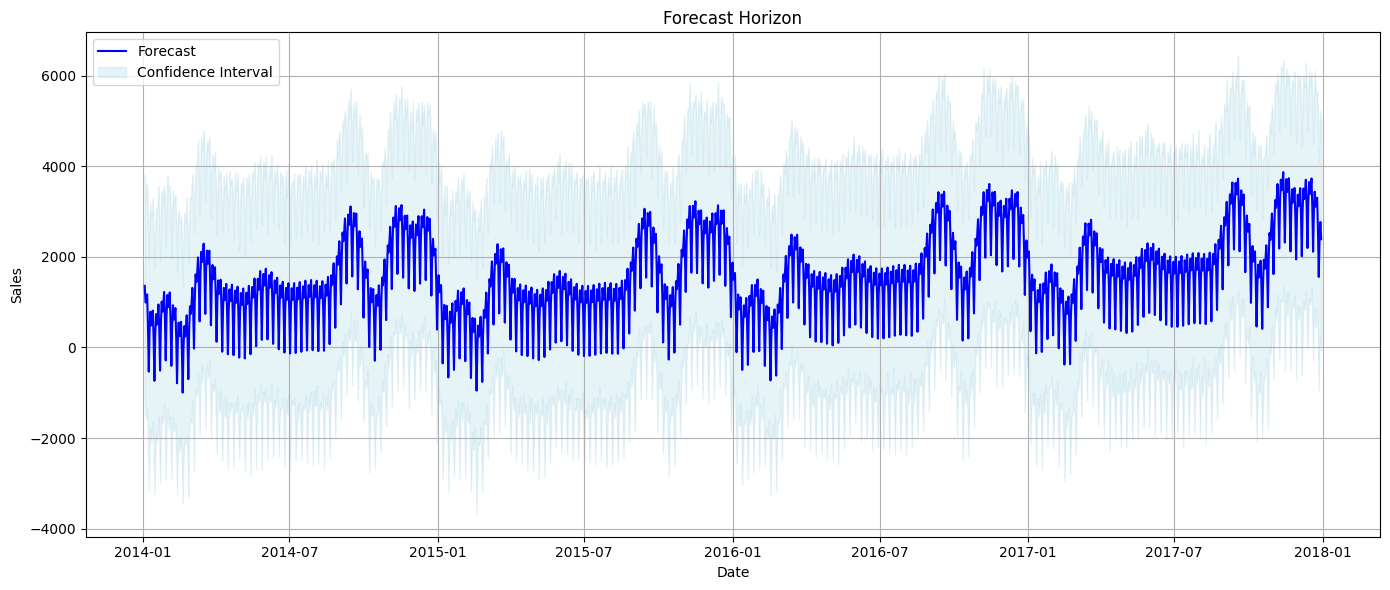

In [6]:
# 🔎 Inspect available columns
print("📂 df_forecast columns:", df_forecast.columns.tolist())

# Try best guess for forecast column
forecast_col = None
for cand in ["Forecast", "yhat", "Prediction", "Predicted", "sales_forecast"]:
    if cand in df_forecast.columns:
        forecast_col = cand
        break

if forecast_col is None:
    raise ValueError("❌ No forecast column found in df_forecast!")

plt.figure(figsize=(14, 6))
plt.plot(df_forecast["Date"], df_forecast[forecast_col], label="Forecast", color="blue")

# Confidence intervals if present
lower_col, upper_col = None, None
for cand_l, cand_u in [("Lower","Upper"), ("yhat_lower","yhat_upper"), ("lower","upper")]:
    if cand_l in df_forecast.columns and cand_u in df_forecast.columns:
        lower_col, upper_col = cand_l, cand_u
        break

if lower_col and upper_col:
    plt.fill_between(df_forecast["Date"], df_forecast[lower_col], df_forecast[upper_col], 
                     color="lightblue", alpha=0.3, label="Confidence Interval")

plt.title("Forecast Horizon")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


5) Plot Actual vs Forecast (validation period)

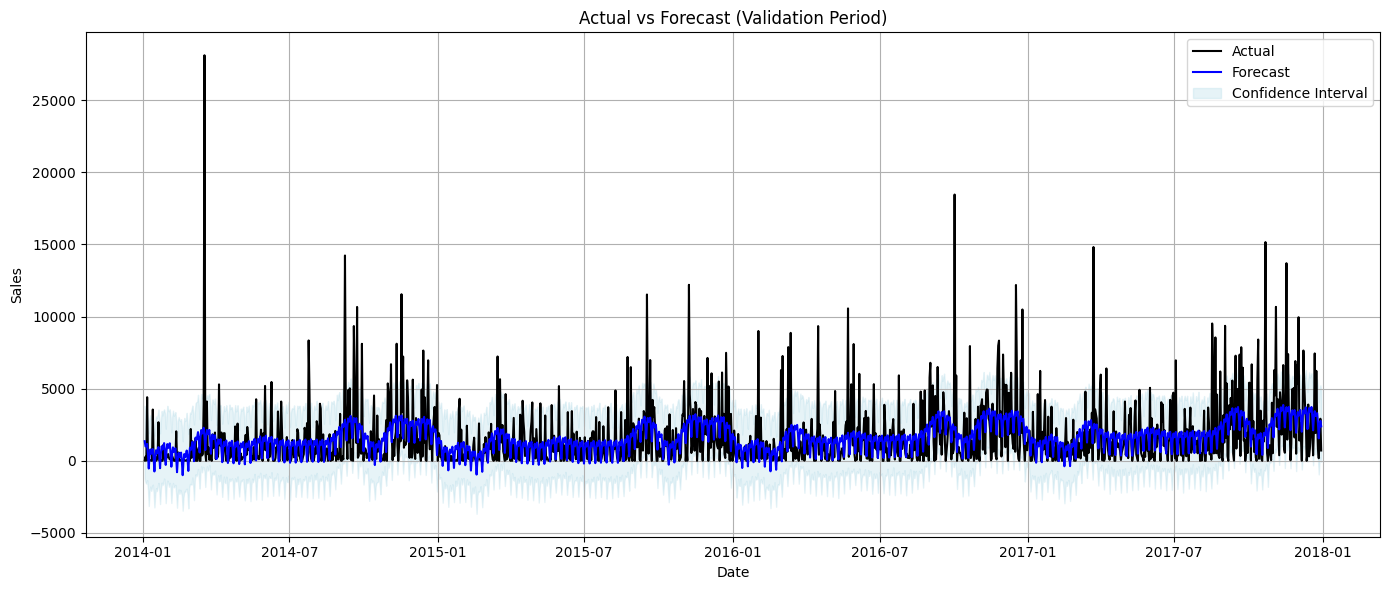

In [9]:
# Detect actual column
actual_col = None
for cand in ["Sales", "Actual", "y", "Observed", "Value"]:
    if cand in df_actual_forecast.columns:
        actual_col = cand
        break

if actual_col is None:
    raise ValueError("❌ Actual sales column not found in df_actual_forecast!")

# Detect forecast column
forecast_col = None
for cand in ["Forecast", "yhat", "Prediction", "Predicted"]:
    if cand in df_actual_forecast.columns:
        forecast_col = cand
        break

if forecast_col is None:
    raise ValueError("❌ Forecast column not found in df_actual_forecast!")

# Plot Actual vs Forecast
plt.figure(figsize=(14, 6))
plt.plot(df_actual_forecast["Date"], df_actual_forecast[actual_col], label="Actual", color="black")
plt.plot(df_actual_forecast["Date"], df_actual_forecast[forecast_col], label="Forecast", color="blue")

# Confidence interval if available
lower_col, upper_col = None, None
for cand_l, cand_u in [("Lower","Upper"), ("yhat_lower","yhat_upper"), ("lower","upper")]:
    if cand_l in df_actual_forecast.columns and cand_u in df_actual_forecast.columns:
        lower_col, upper_col = cand_l, cand_u
        break

if lower_col and upper_col:
    plt.fill_between(
        df_actual_forecast["Date"],
        df_actual_forecast[lower_col],
        df_actual_forecast[upper_col],
        color="lightblue", alpha=0.3, label="Confidence Interval"
    )

plt.title("Actual vs Forecast (Validation Period)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


6) Export Final Cleaned Files

In [10]:
out_forecast = "../data/final_forecast.csv" if os.path.isdir("../data") else "data/final_forecast.csv"
out_actual   = "../data/final_actual_vs_forecast.csv" if os.path.isdir("../data") else "data/final_actual_vs_forecast.csv"

df_forecast.to_csv(out_forecast, index=False)
df_actual_forecast.to_csv(out_actual, index=False)

print("💾 Exported final forecast →", out_forecast)
print("💾 Exported final actual vs forecast →", out_actual)


💾 Exported final forecast → ../data/final_forecast.csv
💾 Exported final actual vs forecast → ../data/final_actual_vs_forecast.csv
